In [38]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_wine

# Exploratory Data Analysis (EDA) & Data Visualization

In [39]:
data = load_wine()
wine_data = pd.DataFrame(data.data, columns=data.feature_names)
# Wine quality labels
wine_data['quality'] = data.target  

In [40]:
wine_data

alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0      14.23        1.71  2.43               15.6      127.0           2.80   
1      13.20        1.78  2.14               11.2      100.0           2.65   
2      13.16        2.36  2.67               18.6      101.0           2.80   
3      14.37        1.95  2.50               16.8      113.0           3.85   
4      13.24        2.59  2.87               21.0      118.0           2.80   
..       ...         ...   ...                ...        ...            ...   
173    13.71        5.65  2.45               20.5       95.0           1.68   
174    13.40        3.91  2.48               23.0      102.0           1.80   
175    13.27        4.28  2.26               20.0      120.0           1.59   
176    13.17        2.59  2.37               20.0      120.0           1.65   
177    14.13        4.10  2.74               24.5       96.0           2.05   

     flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0          3.06                  0.28             2.29             5.64  1.04   
1          2.76                  0.26             1.28             4.38  1.05   
2          3.24                  0.30             2.81             5.68  1.03   
3          3.49                  0.24             2.18             7.80  0.86   
4          2.69                  0.39             1.82             4.32  1.04   
..          ...                   ...              ...              ...   ...   
173        0.61                  0.52             1.06             7.70  0.64   
174        0.75                  0.43             1.41             7.30  0.70   
175        0.69                  0.43             1.35            10.20  0.59   
176        0.68                  0.53             1.46             9.30  0.60   
177        0.76                  0.56             1.35             9.20  0.61   

     od280/od315_of_diluted_wines  proline  quality  
0                            3.92   1065.0        0  
1                            3.40   1050.0        0  
2                            3.17   1185.0        0  
3                            3.45   1480.0        0  
4                            2.93    735.0        0  
..                            ...      ...      ...  
173                          1.74    740.0        2  
174                          1.56    750.0        2  
175                          1.56    835.0        2  
176                          1.62    840.0        2  
177                          1.60    560.0        2  

[178 rows x 14 columns]

In [41]:
wine_data.isna().sum()

alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
quality                         0
dtype: int64

In [42]:
#data inspection
print(wine_data.info())
print(wine_data.describe())

# Check for class imbalance
print(wine_data['quality'].value_counts())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
 13  quali

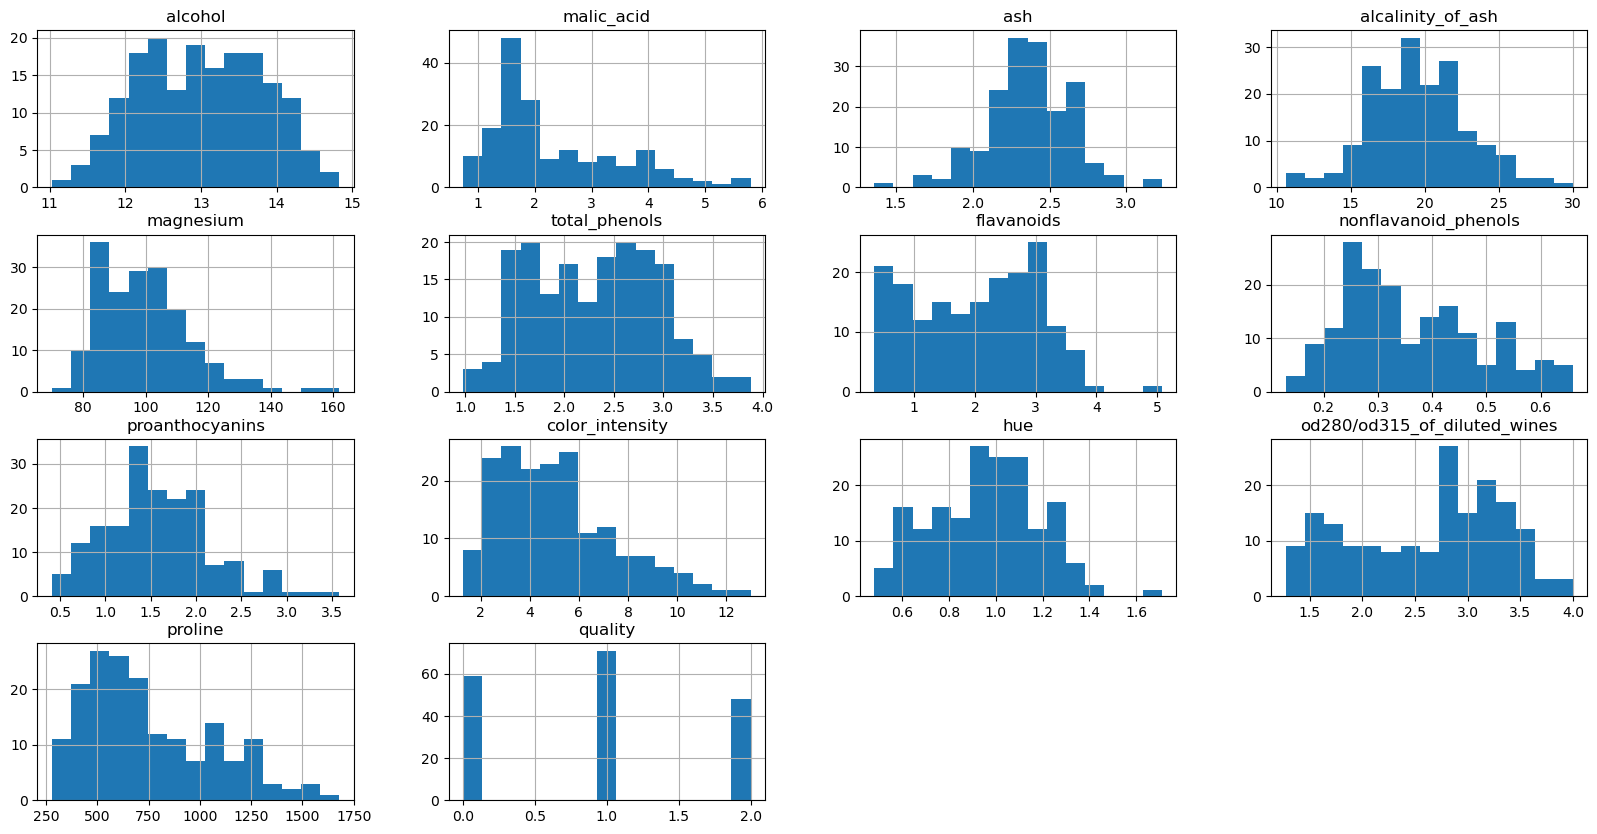

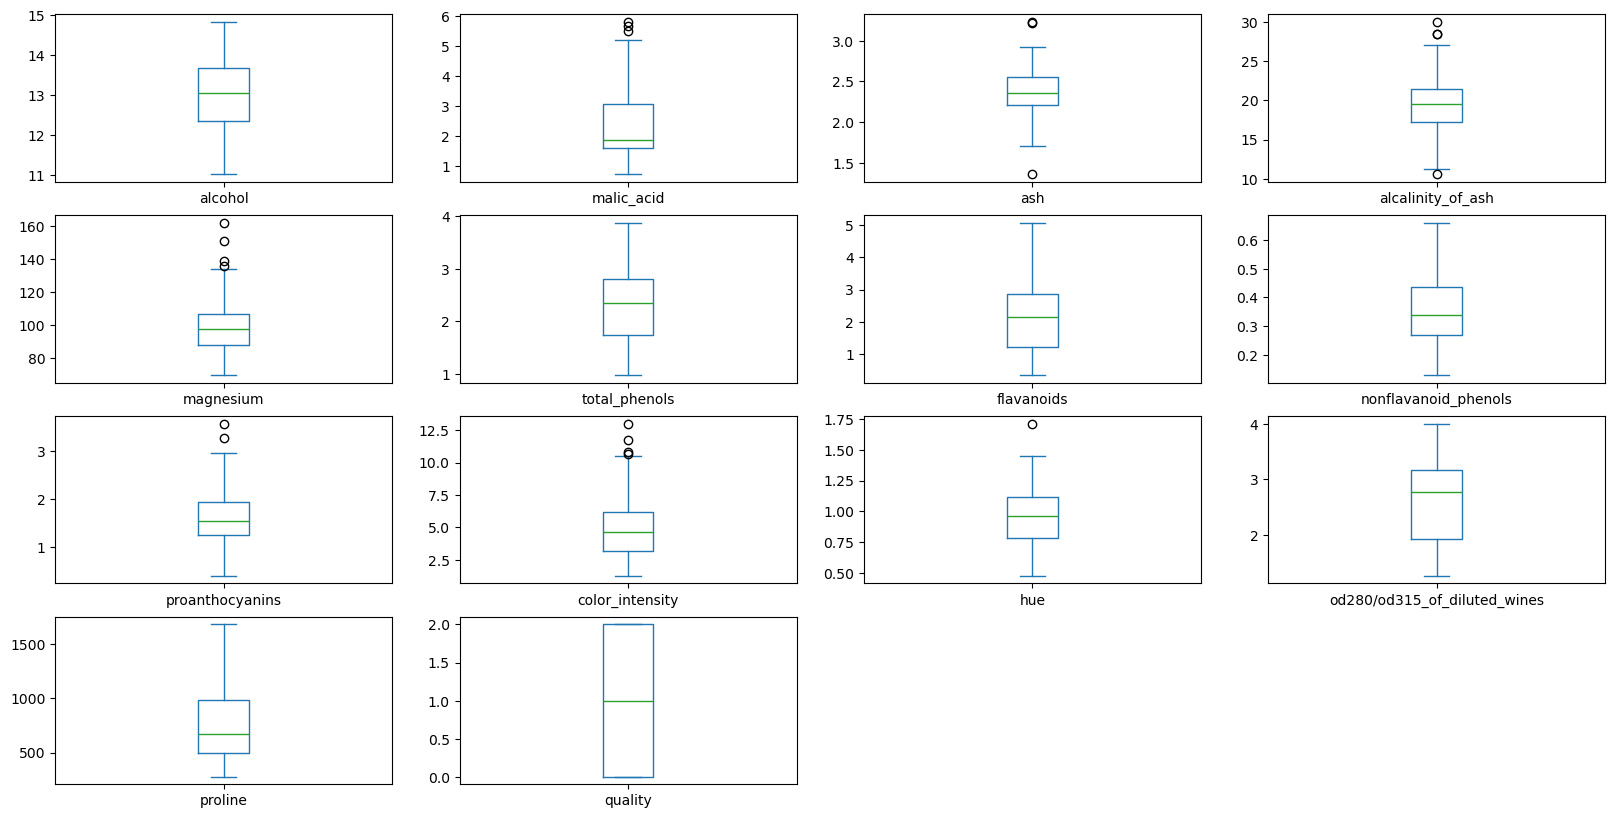

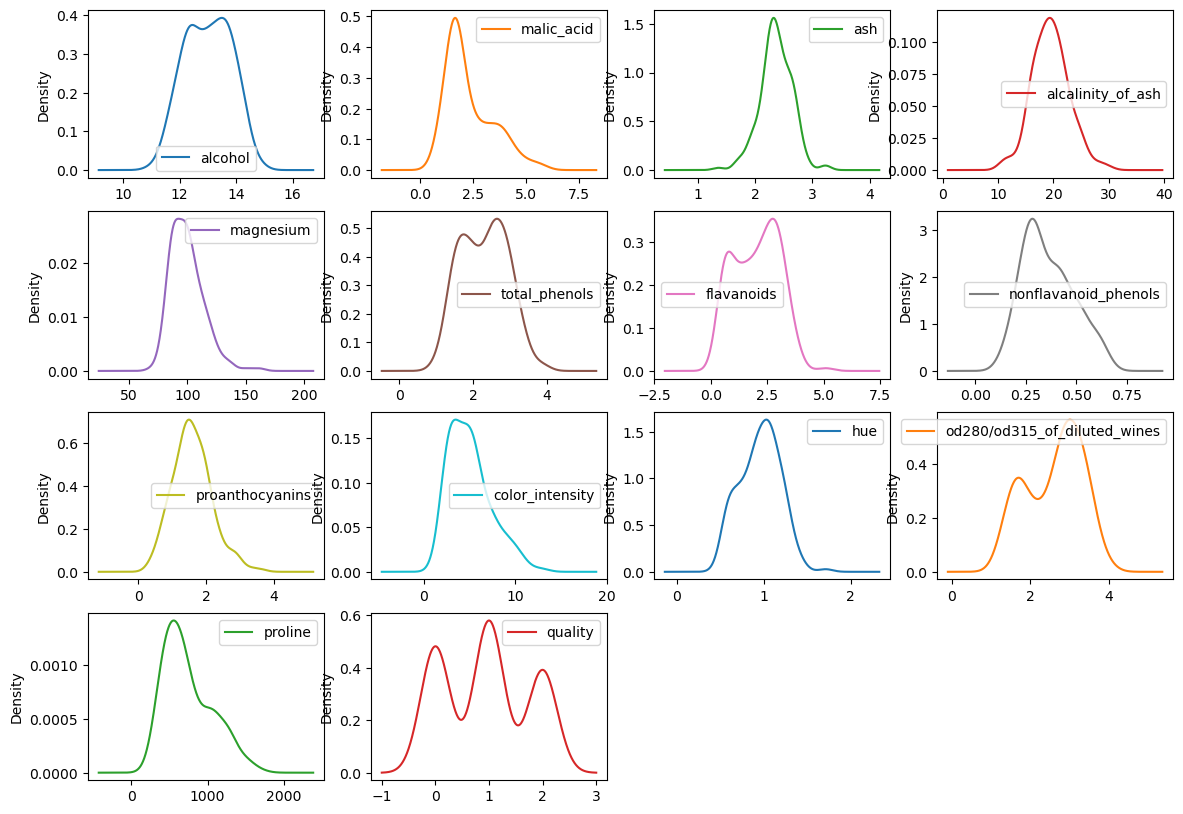

d:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
d:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
d:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
d:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

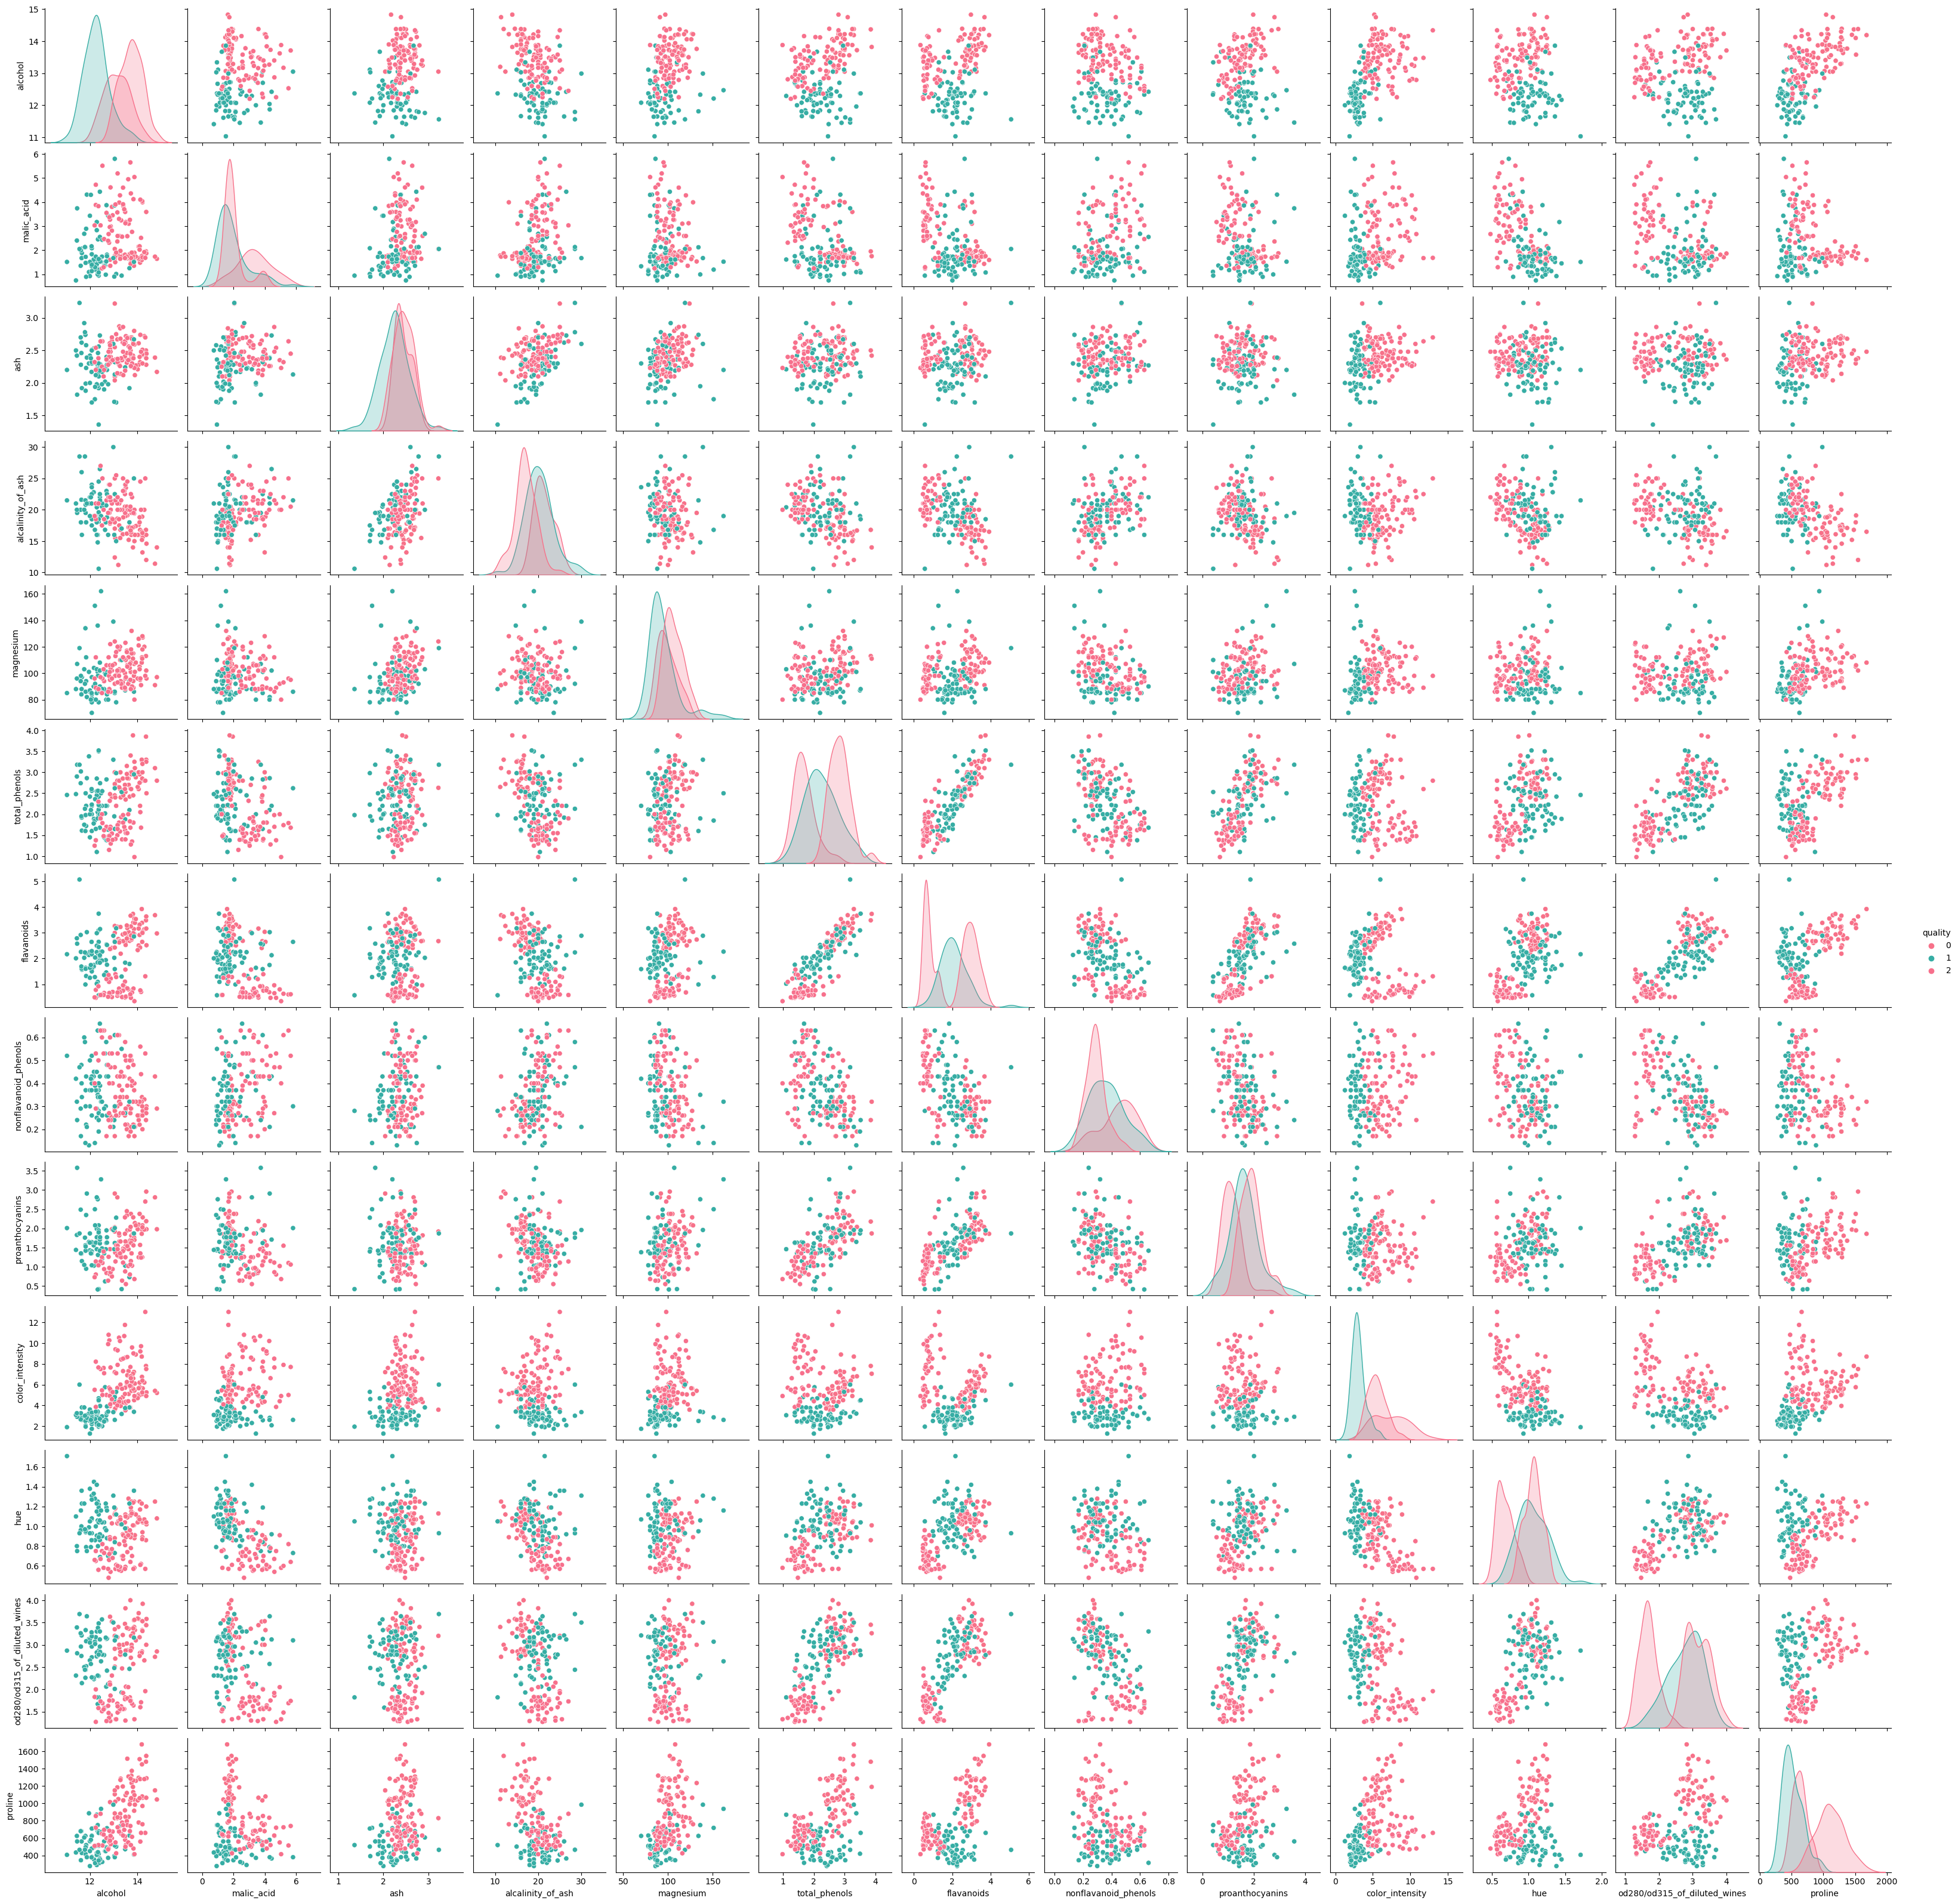

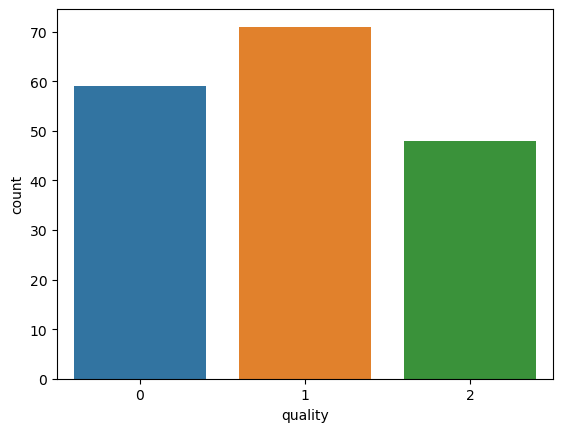

In [53]:
# Plot histograms for individual features
wine_data.hist(bins=15, figsize=(20, 10))
plt.show()

# Box plots for individual features
wine_data.plot(kind='box', subplots=True, layout=(4, 4), figsize=(20, 10))
plt.show()

# Density plots for individual features
df.plot(kind='density', subplots=True, layout=(4,4), sharex=False, sharey=False, figsize=(14, 10))
plt.show()

# Scatter plots to understand relationships
sns.pairplot(wine_data, hue="quality", palette="husl")
plt.show()

# Distribution of quality labels
sns.countplot(x='quality', data = wine_data)
plt.show()

# Data Preparation

In [54]:
# Handle missing or anomalous data if any
print(wine_data.isnull().sum())

alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
quality                         0
dtype: int64


In [55]:
# Standardization
scaler = StandardScaler()
X = df.drop(columns=['quality'])
y = df['quality']
X_scaled = scaler.fit_transform(X)

In [56]:
# Splitting Data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

# Base Model Building

Logistic Regression Accuracy: 0.9722
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       0.93      1.00      0.97        14
           2       1.00      0.90      0.95        10

    accuracy                           0.97        36
   macro avg       0.98      0.97      0.97        36
weighted avg       0.97      0.97      0.97        36



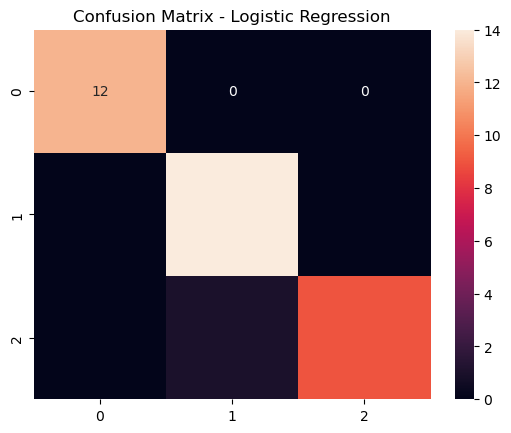

Decision Tree Accuracy: 0.9444
              precision    recall  f1-score   support

           0       0.92      0.92      0.92        12
           1       0.93      0.93      0.93        14
           2       1.00      1.00      1.00        10

    accuracy                           0.94        36
   macro avg       0.95      0.95      0.95        36
weighted avg       0.94      0.94      0.94        36



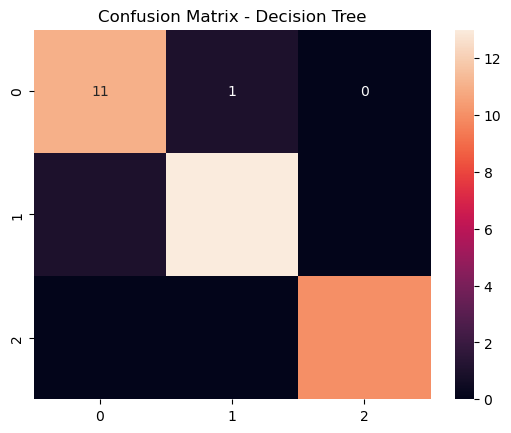

KNN Accuracy: 0.9722
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      0.93      0.96        14
           2       0.91      1.00      0.95        10

    accuracy                           0.97        36
   macro avg       0.97      0.98      0.97        36
weighted avg       0.97      0.97      0.97        36



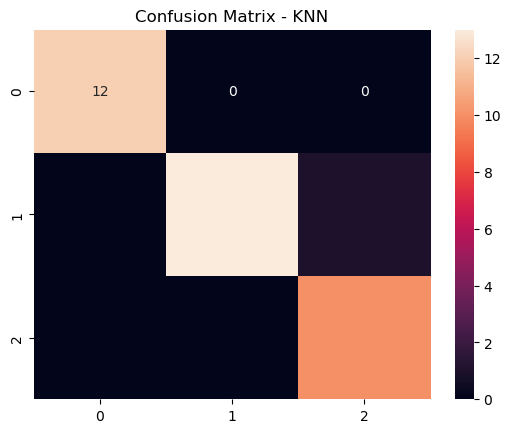

In [57]:
models = {
    "Logistic Regression": LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(),
    "KNN": KNeighborsClassifier()
}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"{name} Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print(classification_report(y_test, y_pred))
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d')
    plt.title(f"Confusion Matrix - {name}")
    plt.show()

# logistic regression model accuracy after hyper parameter tuning 

In [58]:
# Hyperparameter Tuning for Logistic Regression
param_grid_lr = {
    'C': [0.1, 1, 10, 100],
    'solver': ['newton-cg', 'lbfgs', 'sag', 'saga']
}
grid_search_lr = GridSearchCV(LogisticRegression(max_iter=1000), param_grid_lr, cv=5, scoring='accuracy')
grid_search_lr.fit(X_train, y_train)
print("Best parameters for Logistic Regression:", grid_search_lr.best_params_)

Best parameters for Logistic Regression: {'C': 0.1, 'solver': 'newton-cg'}


Final Model Accuracy (Logistic Regression): 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      1.00      1.00        14
           2       1.00      1.00      1.00        10

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36



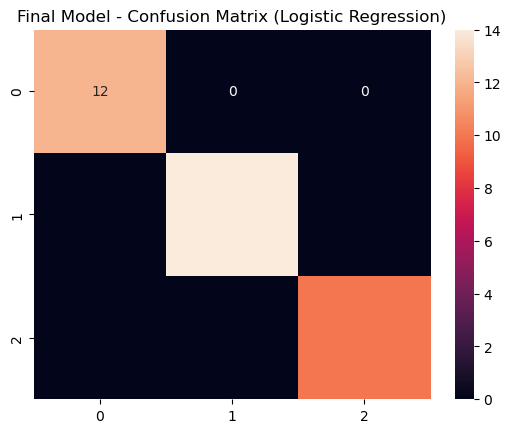

In [59]:
# Testing & Final Model for Logistic Regression
final_model_lr = grid_search_lr.best_estimator_
y_pred_final_lr = final_model_lr.predict(X_test)
print("Final Model Accuracy (Logistic Regression):", accuracy_score(y_test, y_pred_final_lr))
print(classification_report(y_test, y_pred_final_lr))
sns.heatmap(confusion_matrix(y_test, y_pred_final_lr), annot=True, fmt='d')
plt.title("Final Model - Confusion Matrix (Logistic Regression)")
plt.show()

In [74]:
# Error Analysis - Identifying misclassified samples
misclassified_lr = np.where(y_test != y_pred_final_lr)[0]
print(f"Number of misclassified samples: {len(misclassified_lr)}")

Number of misclassified samples: 0


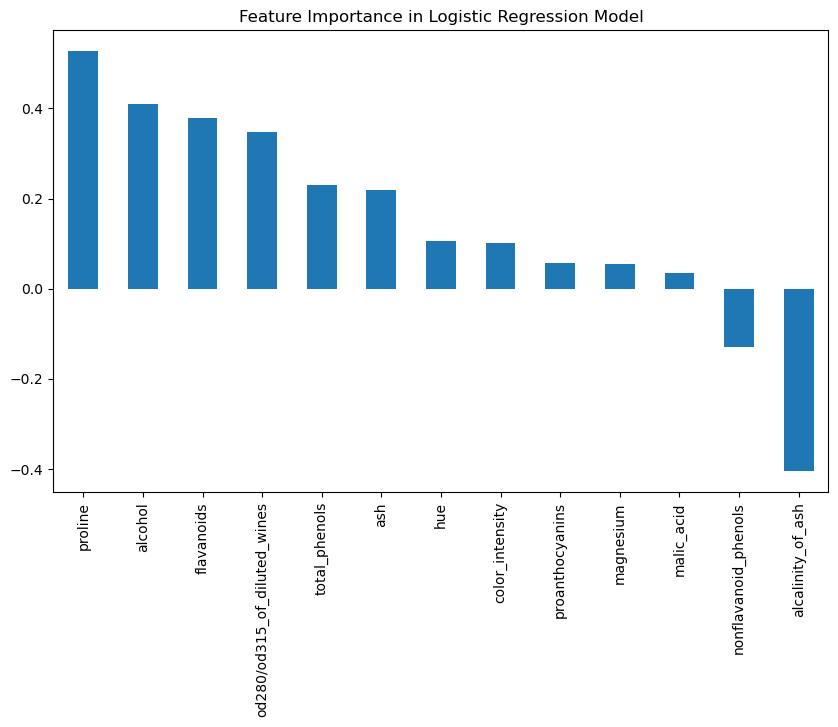

Most important features influencing wine quality:
proline                         0.526874
alcohol                         0.409228
flavanoids                      0.379423
od280/od315_of_diluted_wines    0.348358
total_phenols                   0.229582
dtype: float64


In [68]:
# Model Interpretation - Feature Importance for Logistic Regression
feature_importance_lr = pd.Series(final_model_lr.coef_[0], index=data.feature_names).sort_values(ascending=False)
plt.figure(figsize=(10, 6))
feature_importance_lr.plot(kind='bar')
plt.title("Feature Importance in Logistic Regression Model")
plt.show()

print("Most important features influencing wine quality:")
print(feature_importance_lr.head(5))

# Decision tree model accuracy after hyper parameter tuning

In [69]:
# Hyperparameter Tuning for Decision Tree
param_grid = {
    'max_depth': [3, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
grid_search = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)
print("Best parameters for Decision Tree:", grid_search.best_params_)

Best parameters for Decision Tree: {'max_depth': 3, 'min_samples_leaf': 2, 'min_samples_split': 5}


In [70]:
# Testing & Final Model
final_model = grid_search.best_estimator_
y_pred_final = final_model.predict(X_test)
print("Final Model Accuracy:", accuracy_score(y_test, y_pred_final))
print(classification_report(y_test, y_pred_final))

Final Model Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      1.00      1.00        14
           2       1.00      1.00      1.00        10

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36



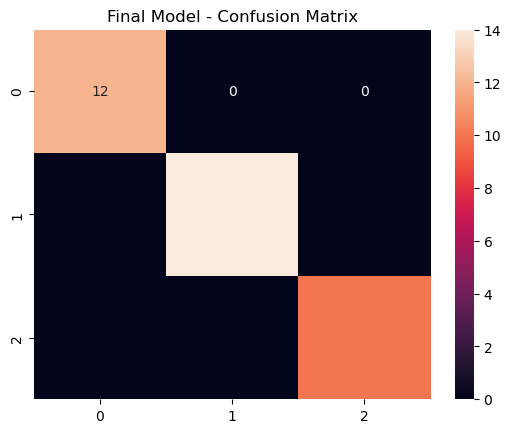

In [71]:
# Confusion Matrix for Final Model
sns.heatmap(confusion_matrix(y_test, y_pred_final), annot=True, fmt='d')
plt.title("Final Model - Confusion Matrix")
plt.show()

In [72]:
# Error Analysis - Identifying misclassified samples
misclassified = np.where(y_test != y_pred_final)[0]
print(f"Number of misclassified samples: {len(misclassified)}")

Number of misclassified samples: 0


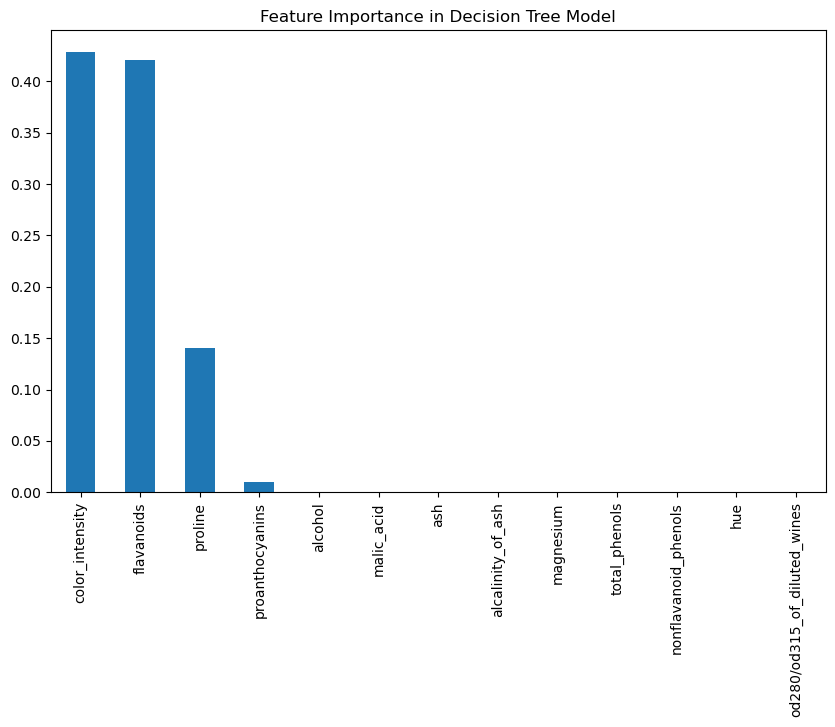

Most important features influencing wine quality:
color_intensity    0.428251
flavanoids         0.420453
proline            0.140829
proanthocyanins    0.010466
alcohol            0.000000
dtype: float64


In [73]:
# Model Interpretation - Feature Importance
feature_importance = pd.Series(final_model.feature_importances_, index=data.feature_names).sort_values(ascending=False)
plt.figure(figsize=(10, 6))
feature_importance.plot(kind='bar')
plt.title("Feature Importance in Decision Tree Model")
plt.show()

print("Most important features influencing wine quality:")
print(feature_importance.head(5))

# KNN model accuracy after hyper parameter tuning 

In [62]:
# Hyperparameter Tuning for KNN
param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}
grid_search_knn = GridSearchCV(KNeighborsClassifier(), param_grid_knn, cv=5, scoring='accuracy')
grid_search_knn.fit(X_train, y_train)
print("Best parameters for KNN:", grid_search_knn.best_params_)

Best parameters for KNN: {'metric': 'manhattan', 'n_neighbors': 9, 'weights': 'distance'}


Final Model Accuracy (KNN): 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      1.00      1.00        14
           2       1.00      1.00      1.00        10

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36



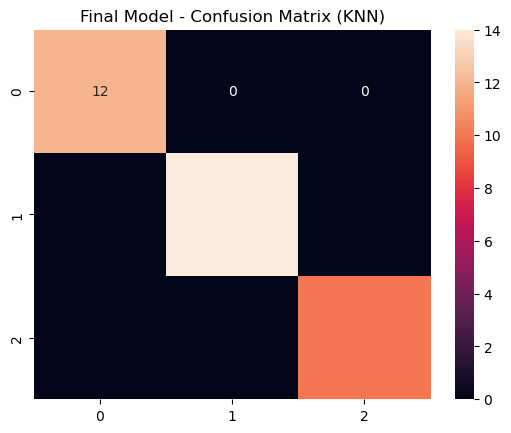

In [63]:
# Testing & Final Model for KNN
final_model_knn = grid_search_knn.best_estimator_
y_pred_final_knn = final_model_knn.predict(X_test)
print("Final Model Accuracy (KNN):", accuracy_score(y_test, y_pred_final_knn))
print(classification_report(y_test, y_pred_final_knn))
sns.heatmap(confusion_matrix(y_test, y_pred_final_knn), annot=True, fmt='d')
plt.title("Final Model - Confusion Matrix (KNN)")
plt.show()

In [64]:
# Error Analysis - Identifying misclassified samples
misclassified = np.where(y_test != y_pred_final_knn)[0]
print(f"Number of misclassified samples: {len(misclassified)}")

Number of misclassified samples: 0


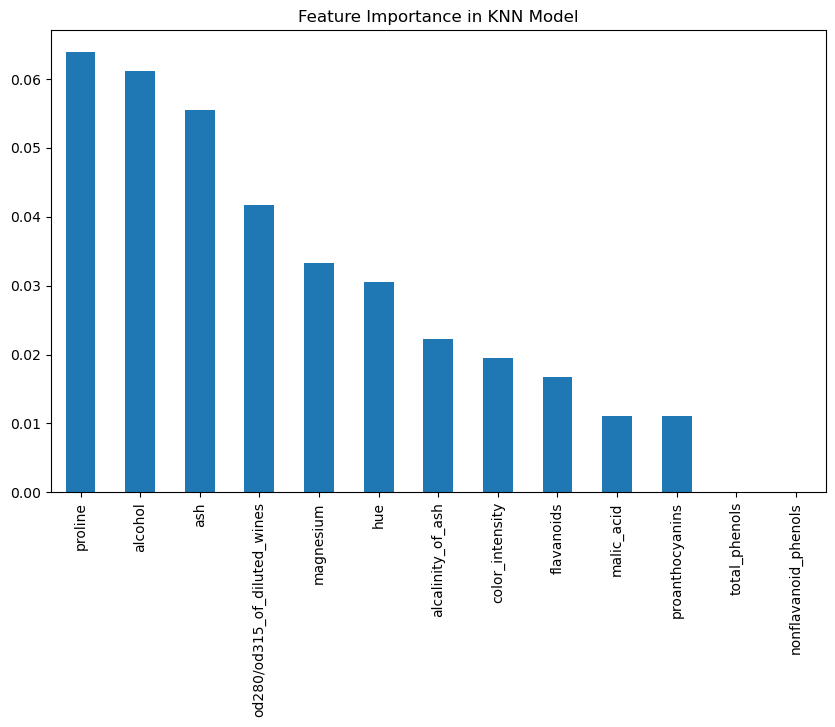

Most important features influencing wine quality:
proline                         0.063889
alcohol                         0.061111
ash                             0.055556
od280/od315_of_diluted_wines    0.041667
magnesium                       0.033333
dtype: float64


In [66]:
from sklearn.inspection import permutation_importance

# Assuming final_model_knn is your trained KNN model
result = permutation_importance(final_model_knn, X_test, y_test, n_repeats=10, random_state=42, n_jobs=-1)

# Create a Series with feature importances
feature_importance_knn = pd.Series(result.importances_mean, index=data.feature_names).sort_values(ascending=False)

# Plotting the feature importances
plt.figure(figsize=(10, 6))
feature_importance_knn.plot(kind='bar')
plt.title("Feature Importance in KNN Model")
plt.show()

print("Most important features influencing wine quality:")
print(feature_importance_knn.head(5))